**Setting up Mercury**
Mercury allows for the setup of interactive widgets, enabling the sharing of notebooks in an interactive web format. I chose this method to enable easier access to my project and to familiarize myself with an interesting library I came across.

In [15]:
import mercury as mr
app = mr.App(title = "Medical Malpractice Notebook",
description = "Analysis of malpractice insurance claims data from Kaggle.",
show_code = True,
static_notebook = True)

mercury.App

**Setting up libraries**

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt

**Reading in Medical Malpractice data from CSV** 

In [17]:
df = pd.read_csv("medicalmalpractice.csv")

Let's take a look at the data types and check if there are nulls.

In [18]:
print("Are there nulls in the data set? --> ", df.isnull().values.any())
print("-----------------------------------------")
display(df.dtypes)

Are there nulls in the data set? -->  False
-----------------------------------------


Amount               int64
Severity             int64
Age                  int64
Private Attorney     int64
Marital Status       int64
Specialty           object
Insurance           object
Gender              object
dtype: object

In [19]:
display(df.head())

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,1,2,Family Practice,Private,Male
1,324976,6,38,1,2,OBGYN,No Insurance,Female
2,135383,4,34,1,2,Cardiology,Unknown,Male
3,829742,7,42,1,1,Pediatrics,No Insurance,Female
4,197675,3,60,0,2,OBGYN,Medicare/Medicaid,Female


The data appears to have been cleaned, showing no nulls or strange values. 

The only point of note are the "Unknown" values in the Insurance column. Let's get a count of how many are present in the data and if they are relevant or if we can drop them.

In [20]:
display(df['Insurance'].value_counts())

Insurance
Private                 34289
Unknown                 24052
Medicare/Medicaid       10882
No Insurance             8002
Workers Compensation     1985
Name: count, dtype: int64

'Unknown' appears to be a common value in our dataset. It will be difficult to understand what role type of insurance has on Claims amounts.

We'll still look to see how noisy Claims look when we filter by Insurance type to see if there is anything that sticks out.

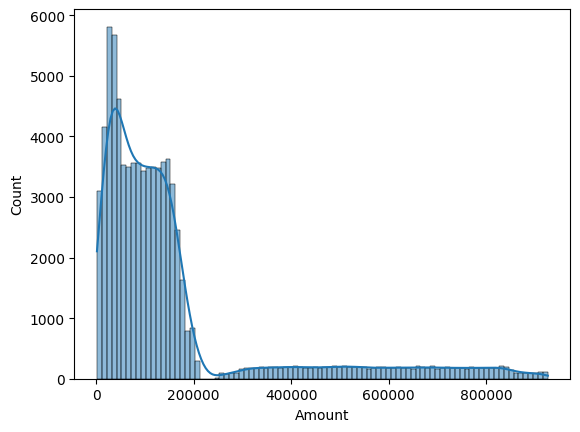

In [27]:
sns.histplot(data=df, x = "Amount", binwidth=10000, kde = True)
plt.show()

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
5180,1576,3,75,0,4,Anesthesiology,Unknown,Male
32946,1578,3,52,0,2,Internal Medicine,Private,Female
49769,1589,3,32,0,2,Anesthesiology,Medicare/Medicaid,Male
5287,1589,3,49,0,2,OBGYN,Unknown,Female
2309,1612,3,44,0,1,Ophthamology,Unknown,Male


---------------------------------------------------

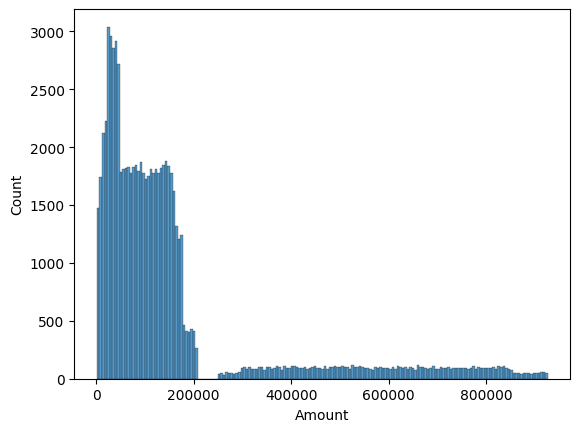

In [43]:
## Isolate large claims amounts --> Analyze separate from lower claims amounts
#Copy dataframe
df_large = df.copy()

#Order Amounts in Ascending Order
df_large = df_large.sort_values(by=['Amount'])
display(df_large.head())
print("---------------------------------------------------")
sns.histplot(data = df_large, x = 'Amount')
plt.show()